In [6]:
library(tidyverse)
list.files(path = "../input")

[1] "sandp500"

In [7]:
df <- read.csv("/kaggle/input/sandp500/all_stocks_5yr.csv")

In [8]:
df_aal <- df %>% filter(Name == "AAL")

# Data summarization

In [9]:
cat("First 6 rows","\n")
print(head(df_aal))
cat("\n")
cat("Last 6 rows","\n")
print(tail(df_aal))
tail(df_aal)
str(df_aal)


First 6 rows 
        date  open  high   low close   volume Name
1 2013-02-08 15.07 15.12 14.63 14.75  8407500  AAL
2 2013-02-11 14.89 15.01 14.26 14.46  8882000  AAL
3 2013-02-12 14.45 14.51 14.10 14.27  8126000  AAL
4 2013-02-13 14.30 14.94 14.25 14.66 10259500  AAL
5 2013-02-14 14.94 14.96 13.16 13.99 31879900  AAL
6 2013-02-15 13.93 14.61 13.93 14.50 15628000  AAL

Last 6 rows 
           date  open  high   low close  volume Name
1254 2018-01-31 53.08 54.71 53.00 54.32 5962937  AAL
1255 2018-02-01 54.00 54.64 53.59 53.88 3623078  AAL
1256 2018-02-02 53.49 53.99 52.03 52.10 5109361  AAL
1257 2018-02-05 51.99 52.39 49.75 49.76 6878284  AAL
1258 2018-02-06 49.32 51.50 48.79 51.18 6782480  AAL
1259 2018-02-07 50.91 51.98 50.89 51.40 4845831  AAL


,date,open,high,low,close,volume,Name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1254,2018-01-31,53.08,54.71,53.00,54.32,5962937,AAL
1255,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1256,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1257,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1258,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1259,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


'data.frame':	1259 obs. of  7 variables:
 $ date  : chr  "2013-02-08" "2013-02-11" "2013-02-12" "2013-02-13" ...
 $ open  : num  15.1 14.9 14.4 14.3 14.9 ...
 $ high  : num  15.1 15 14.5 14.9 15 ...
 $ low   : num  14.6 14.3 14.1 14.2 13.2 ...
 $ close : num  14.8 14.5 14.3 14.7 14 ...
 $ volume: int  8407500 8882000 8126000 10259500 31879900 15628000 11354400 14725200 11922100 6071400 ...
 $ Name  : chr  "AAL" "AAL" "AAL" "AAL" ...


# Cleaning the dataset Before Analysis

In [10]:
df_aal$date <- as.Date(df_aal$date)
head(df_aal)
colnames(df_aal)[7] <- "company_name"
colnames(df_aal)

,date,open,high,low,close,volume,Name
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
3,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
4,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
5,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
6,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL


[1] "date"         "open"         "high"         "low"          "close"       
[6] "volume"       "company_name"

In [11]:
min(df_aal$date)
max(df_aal$date)

[1] "2013-02-08"

[1] "2018-02-07"

# Statistical Analysis 
* Min, Max, What is the range , Median, Mean, Quantile distribution, Standard Deviation, Variance

In [12]:


df_aal_summary <- df_aal[, 2:6]

for (colname in colnames(df_aal_summary)) {
  cat("Statistical Distribution of", colname, "\n")
  
  if (is.numeric(df_aal_summary[[colname]])) {
    cat("Min :", min(df_aal_summary[colname]),
        "| Q1 : ", quantile(df_aal_summary[[colname]], 0.25), 
        "| Q2 : ", quantile(df_aal_summary[[colname]], 0.5), 
        "| Q3 : ", quantile(df_aal_summary[[colname]],0.75),
        "| Mean:", mean(df_aal_summary[[colname]]), 
        "| Max:", max(df_aal_summary[[colname]]),
        "| Range:", max(df_aal_summary[colname]) - min(df_aal_summary[colname]),
        "| SD : ", sd(df_aal_summary[[colname]]),
        "| Var :", var(df_aal_summary[[colname]]),
        "| IQR(Q3 - Q1) :", IQR(df_aal_summary[[colname]]),
        "\n\n")
  } else {
    cat("Column is not numeric.\n")
  }
}



Statistical Distribution of open 
Min : 13.14 | Q1 :  34.205 | Q2 :  40.93 | Q3 :  46.565 | Mean: 38.3905 | Max: 58.79 | Range: 45.65 | SD :  10.96709 | Var : 120.277 | IQR(Q3 - Q1) : 12.36 

Statistical Distribution of high 
Min : 13.42 | Q1 :  34.93 | Q2 :  41.4295 | Q3 :  47.1875 | Mean: 38.95555 | Max: 59.08 | Range: 45.66 | SD :  11.07365 | Var : 122.6257 | IQR(Q3 - Q1) : 12.2575 

Statistical Distribution of low 
Min : 12.7 | Q1 :  33.69 | Q2 :  40.2099 | Q3 :  45.99 | Mean: 37.82561 | Max: 57.8 | Range: 45.1 | SD :  10.84365 | Var : 117.5848 | IQR(Q3 - Q1) : 12.3 

Statistical Distribution of close 
Min : 13.02 | Q1 :  34.33 | Q2 :  40.87 | Q3 :  46.535 | Mean: 38.39325 | Max: 58.47 | Range: 45.45 | SD :  10.95764 | Var : 120.0698 | IQR(Q3 - Q1) : 12.205 

Statistical Distribution of volume 
Min : 1352400 | Q1 :  5696393 | Q2 :  8111323 | Q3 :  11188535 | Mean: 9390321 | Max: 137767165 | Range: 136414765 | SD :  6899305 | Var : 4.760041e+13 | IQR(Q3 - Q1) : 5492142 



* Min value of **close** prices is 13.02.
* Highest of **close** price is 58.47.
* 50 % of **close** prices are in between 13.02 and 40.87.(Min - Q2)
* 50 % of **close** prices are in between 40.87and 58.47. (Q2 - Max)

# Data Analysis and Visualization

# Visualizing trend of the high and low of American Air lines over the 5 Years

In [13]:
options(repr.plot.width = 30, repr.plot.height = 10)  

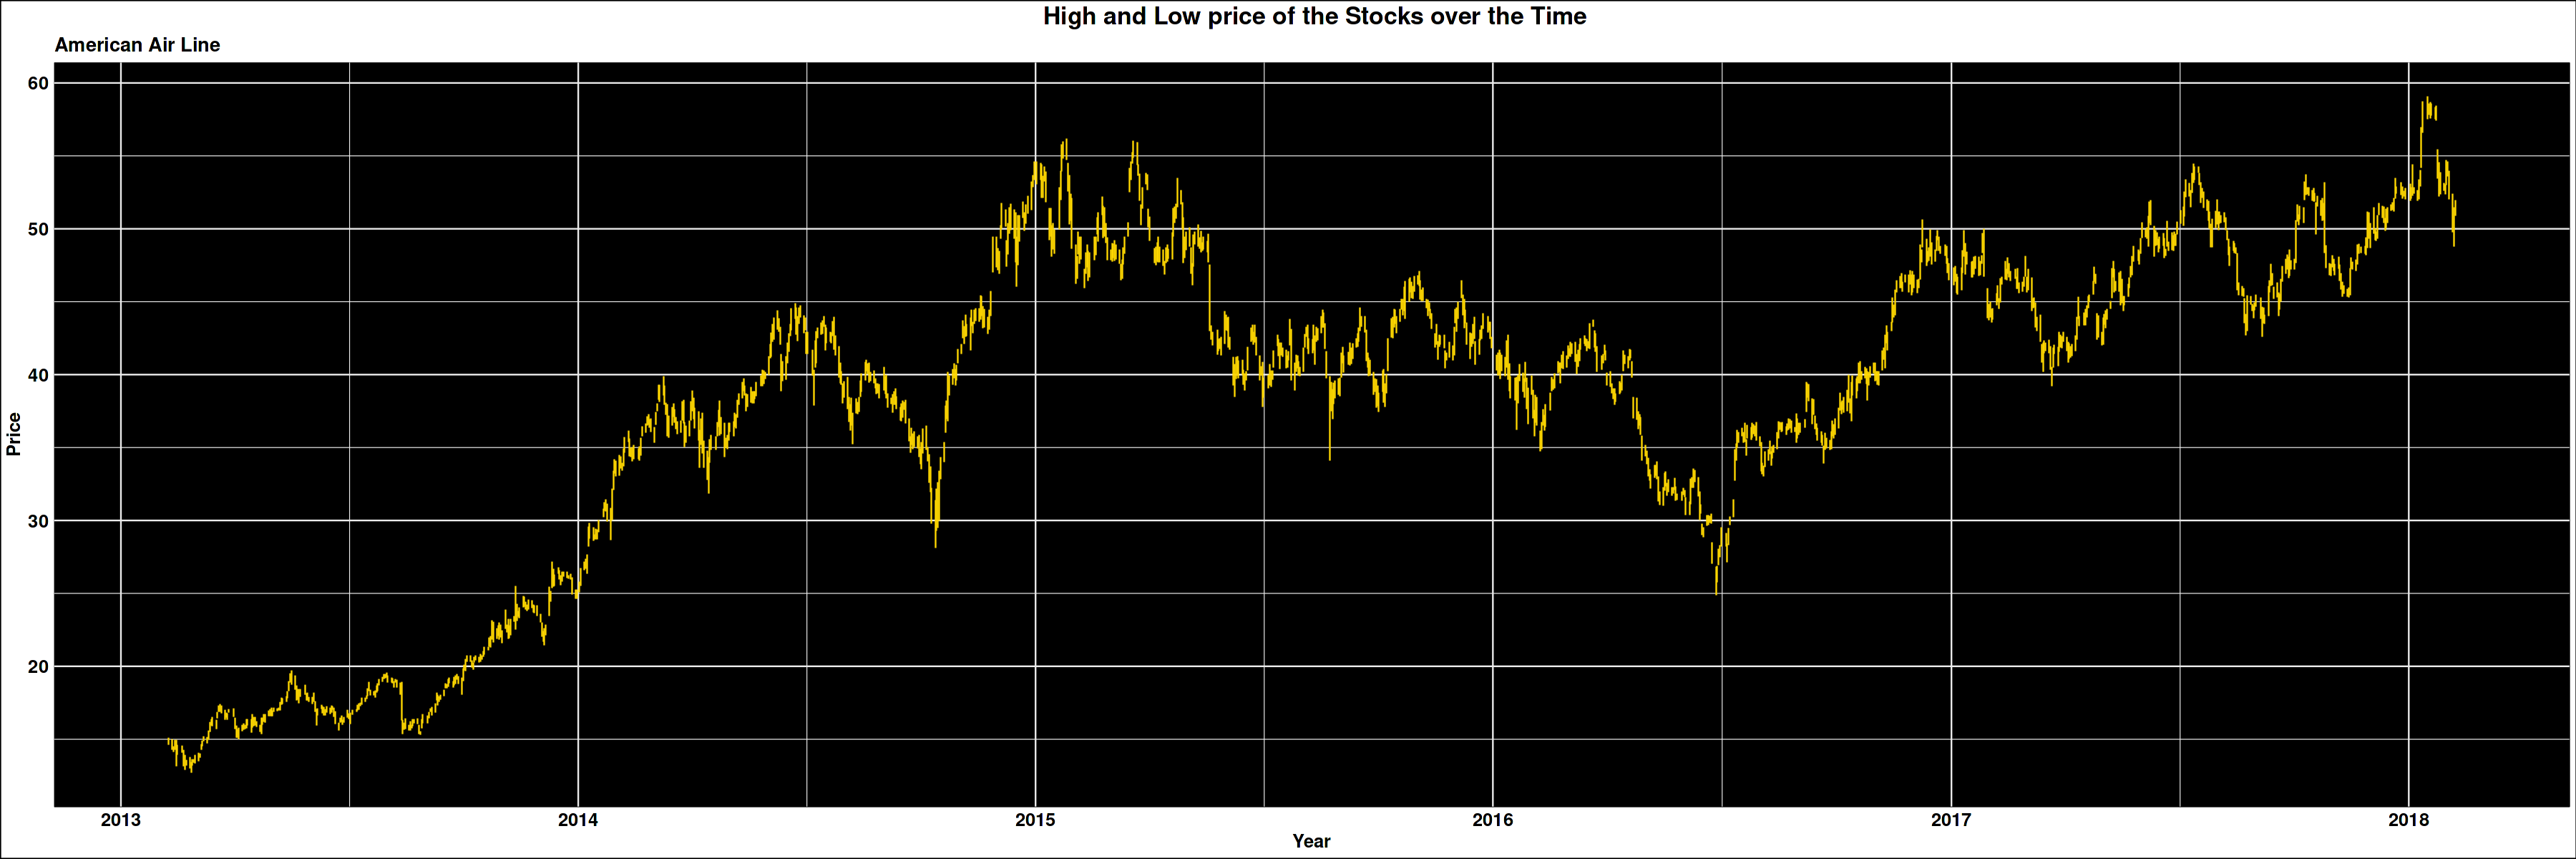

In [14]:
ggplot(df_aal, aes(x = date))+
geom_segment(aes(x= date, xend = date, y = low, yend = high), color = "gold")+
labs(title = " High and Low price of the Stocks over the Time", subtitle = "American Air Line", x = "Year", y = "Price")+
scale_x_date(date_break = "1 year", date_labels = "%Y")+
theme_minimal()+
theme(
    panel.background = element_rect(fill = "black"),
    plot.background = element_rect(fill = "white"),
 plot.title = element_text(face = "bold",color = "black", size = 20,hjust = 0.5),
    plot.subtitle = element_text(face = "bold",color = "black", size = 16),
      axis.text.x = element_text(color = "black", face ="bold", size = 15),
     axis.text.y = element_text(color = "black", face ="bold", size = 15),
     axis.title.x = element_text(color = "black", face = "bold", size = 15),
     axis.title.y = element_text(color = "black", face = "bold", size = 15))




# Visualizing Stock's prices in one Graph (Open, Close, High, Low) for Year of  2017 and 2018

[1] 2017 2018

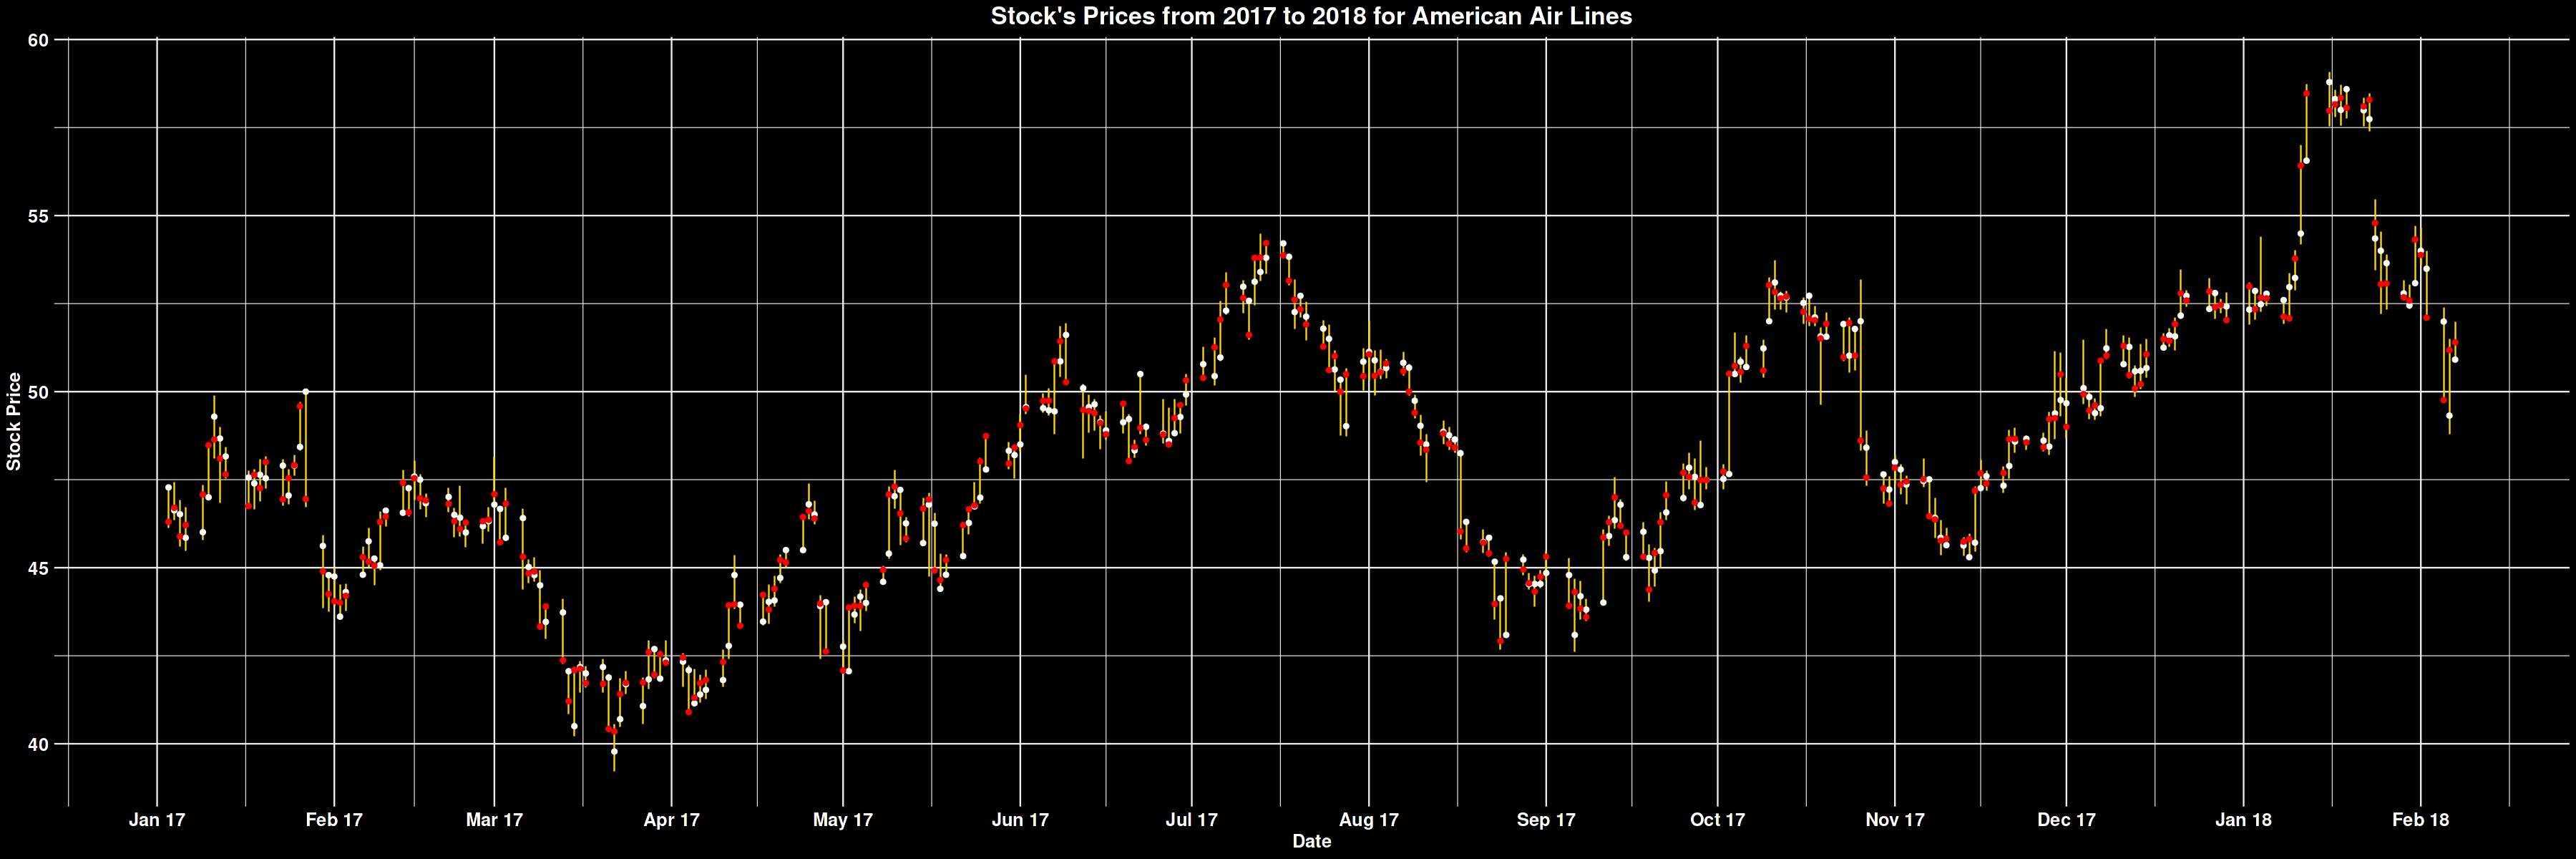

In [15]:
# Filter data for 2017 and 2018
aal_2017_2018 <- df_aal %>% filter(year(date) %in% c(2017,2018))
unique(year(aal_2017_2018$date))

ggplot(aal_2017_2018, aes(x = date)) +
  geom_segment(aes(x = date, xend = date, y = low, yend = high), color = "gold") +
  geom_point(aes(x = date, y = open), color = "white") +
  geom_point(aes(x = date, y = close), color = "red") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %y")+
  labs(title = "Stock's Prices from 2017 to 2018 for American Air Lines",
       y = "Stock Price",
       x = "Date") +
  theme_minimal()+
theme(
plot.title = element_text(color= "white", face= "bold",size = 20, hjust = 0.5),
plot.background = element_rect(fill = "black"),
axis.text.x = element_text(color = "white", size = 15, face = "bold"),
axis.text.y = element_text(color = "white", size =15, face= "bold"),
axis.title.x = element_text(face = "bold", color = "white", size = 15),
axis.title.y = element_text(face = "bold", color = "white", size = 15))


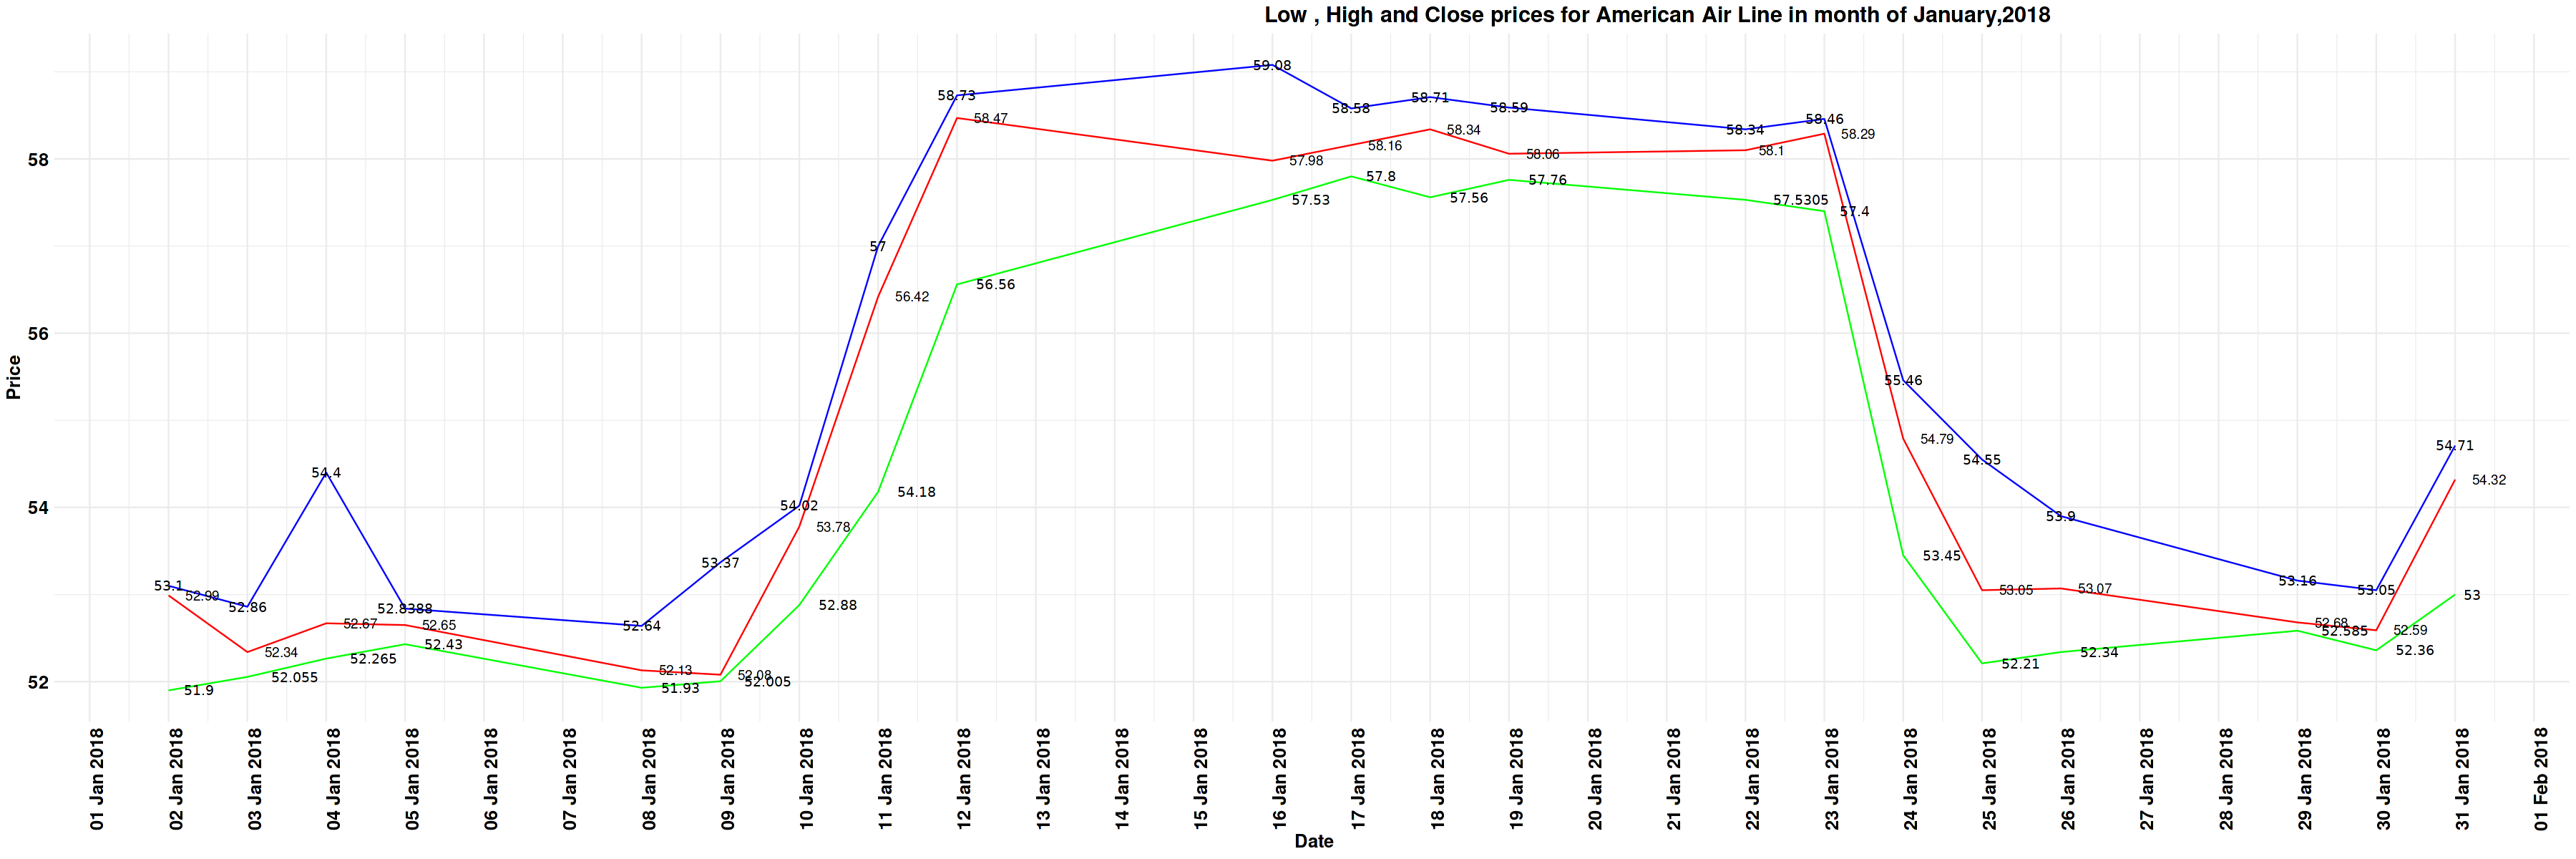

In [16]:
df_aal$Year <- year(df_aal$date)
df_aal$Month <- month(df_aal$date)

#filtered data for month of january 2018
aal_jan_2018 <- df_aal%>% filter(Year == 2018 & Month== 1)

ggplot(aal_jan_2018, aes(x= date))+
labs(title = "Low , High and Close prices for American Air Line in month of January,2018", x = " Date", y = "Price")+
geom_line(aes(x = date, y = close), color = "red")+
geom_line(aes(x = date, y = high), color = "blue")+
geom_line(aes(x = date, y = low), color = "green")+
geom_text(aes(x= date, y = low, label = low), color = "black", family= "bold", hjust = -0.5)+
geom_text(aes(x= date, y = high, label = high), color = "black", family ="bold")+
geom_text(aes (x = date, y = close, label = close), color ="black", hjust = -0.5)+
scale_x_date(date_breaks = "1 day",date_labels = "%d %b %Y") +
theme_minimal()+
theme(
plot.title = element_text(face = "bold", size =18, color = "black", hjust = 0.7),
axis.title.x = element_text(color = "black", size =15, face= "bold"),
axis.title.y = element_text(color = "black", size =15, face= "bold"),
axis.text.x = element_text(color = "black", size = 15, face = "bold", angle = 90),
axis.text.y = element_text(color = "black", size =15, face= "bold"))



Though the Line graph we can see clearly,
* Highest price value for "High Price" is 59.08 that reported on 16th of January, 2018.
* 58.47 is highest close price for AAL for this time period(2013 - 2018) and that price reported on 12th of January, 2018


# Aanlyzing and comparing Stock's Prices for selected 5 Companies.

Companies are
* AAL - American air Lines
* AMZN - Amazon
* NFLX - Netfilx
* MGM - MGM Resorts International
* MSFT - Microsoft


In [17]:
df1 <- read.csv('/kaggle/input/sandp500/all_stocks_5yr.csv')
filtered_data1 <- df1 %>% select(Name, date, open, high, low, close, volume) %>% filter(Name %in% c('AAL', 'AMZN', 'NFLX', 'MGM', 'MSFT'))
summary(filtered_data1)
head(filtered_data1)

     Name               date                open              high        
 Length:6295        Length:6295        Min.   :  12.00   Min.   :  12.04  
 Class :character   Class :character   1st Qu.:  31.89   1st Qu.:  32.26  
 Mode  :character   Mode  :character   Median :  47.95   Median :  48.64  
                                       Mean   : 156.95   Mean   : 158.50  
                                       3rd Qu.: 123.91   3rd Qu.: 125.74  
                                       Max.   :1477.39   Max.   :1498.00  
      low              close             volume         
 Min.   :  11.72   Min.   :  11.99   Min.   :   950725  
 1st Qu.:  31.55   1st Qu.:  31.91   1st Qu.:  4883432  
 Median :  47.39   Median :  47.90   Median :  8998943  
 Mean   : 155.27   Mean   : 156.97   Mean   : 14384240  
 3rd Qu.: 122.23   3rd Qu.: 123.72   3rd Qu.: 19125814  
 Max.   :1450.04   Max.   :1450.89   Max.   :248354245  

,Name,date,open,high,low,close,volume
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,AAL,2013-02-08,15.07,15.12,14.63,14.75,8407500
2,AAL,2013-02-11,14.89,15.01,14.26,14.46,8882000
3,AAL,2013-02-12,14.45,14.51,14.10,14.27,8126000
4,AAL,2013-02-13,14.30,14.94,14.25,14.66,10259500
5,AAL,2013-02-14,14.94,14.96,13.16,13.99,31879900
6,AAL,2013-02-15,13.93,14.61,13.93,14.50,15628000


Second Way
* Import csv file seperately and combined together using rbind.

In [18]:
aal  <- read.csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv')
amzn <- read.csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMZN_data.csv')
mgm  <- read.csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MGM_data.csv')
msft <- read.csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MSFT_data.csv')
nflx <- read.csv('/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/NFLX_data.csv')

# Cheking column names of all data set's before bind them
colnames(aal)
colnames(amzn)
colnames(mgm)
colnames(msft)
colnames(nflx)

df_5 <- rbind(aal,amzn,mgm,msft,nflx)
#checking sample from the data sets
sample_data <- df_5 %>% sample_frac(0.003)
sample_data


[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

date,open,high,low,close,volume,Name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
2015-01-02,54.2800,54.6000,53.0700,53.9100,10756705,AAL
2016-05-25,708.0000,710.8600,705.5159,708.3500,3276631,AMZN
2013-03-01,26.7300,27.1914,26.6014,27.0528,21448756,NFLX
2013-09-26,44.0057,44.9271,43.9285,44.7871,12464816,NFLX
2014-10-14,20.1300,20.8000,19.8700,20.6200,14582696,MGM
2016-02-09,34.9300,36.7500,34.9100,36.1900,11143254,AAL
2017-03-24,41.6900,42.0650,41.4200,41.7300,6596629,AAL
2013-12-13,37.4200,37.4500,36.6200,36.6900,40074360,MSFT
2013-08-08,298.5200,298.5200,292.5501,295.7400,2343430,AMZN


In [19]:
colnames(df_5)
colnames(df_5)[7]<- "company_name"
colnames(df_5)

[1] "date"   "open"   "high"   "low"    "close"  "volume" "Name"

[1] "date"         "open"         "high"         "low"          "close"       
[6] "volume"       "company_name"

**Visualizing Total Volume for 5 companies over the 5 years**

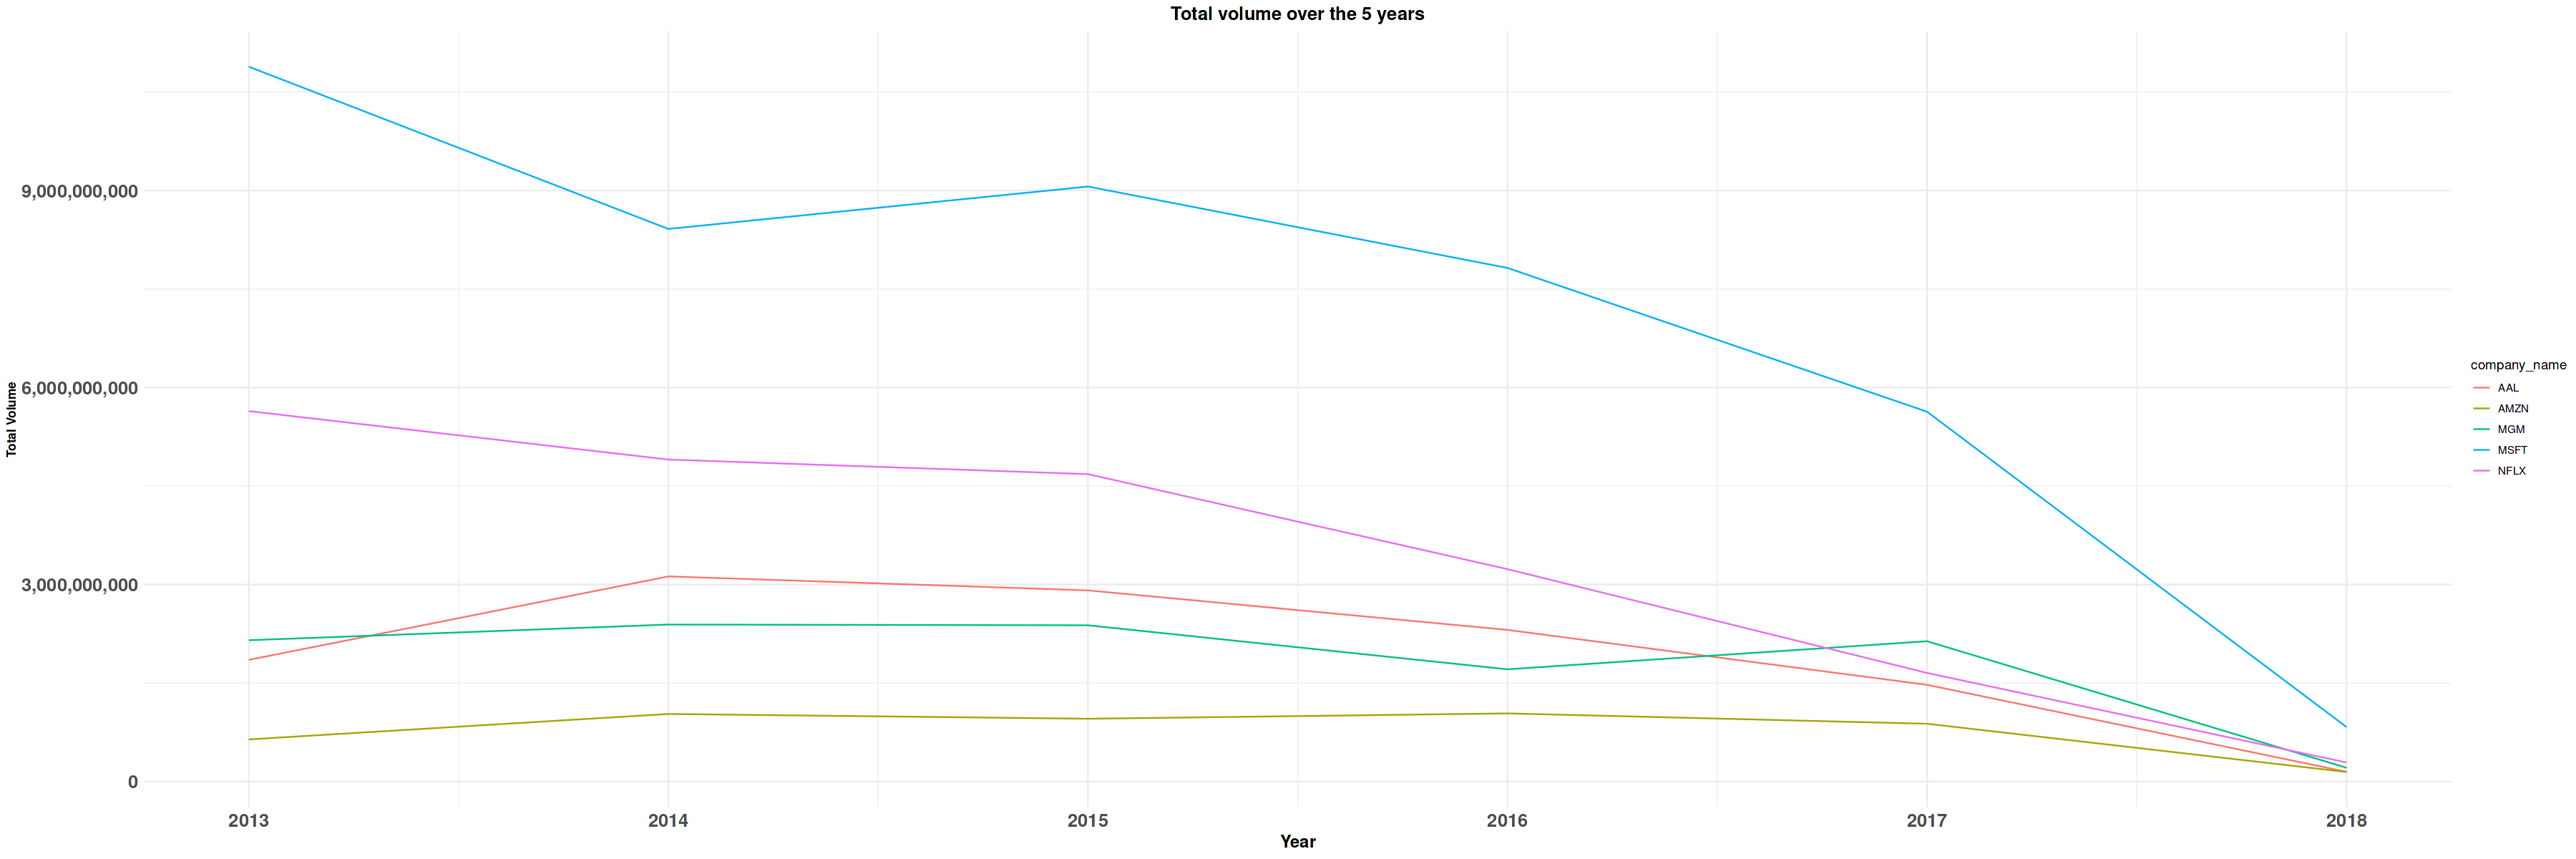

In [20]:

df_5$date <- as.Date(df_5$date)

df_5%>% select(company_name, date, volume) %>% 
group_by(company_name, year = year(date)) %>% 
summarise(total_volume = sum(volume), .groups = 'drop')%>%
ggplot(aes(x = year))+
geom_line(aes(x= year, y = total_volume,color = company_name))+
scale_y_continuous(labels = scales::comma)+
labs(title = "Total volume over the 5 years", x = "Year",y = "Total Volume" )+
theme_minimal()+
theme(plot.title =  element_text(face ='bold', size = 15, hjust = 0.5),
     axis.title.x = element_text(face = 'bold', size = 14),
     axis.title.y = element_text(face = 'bold', size = 10),
     axis.text.x = element_text(face ="bold", size = 15),
     axis.text.y = element_text(face ="bold", size = 15))


**Creating Pie Chart to see Contribution of Each company**

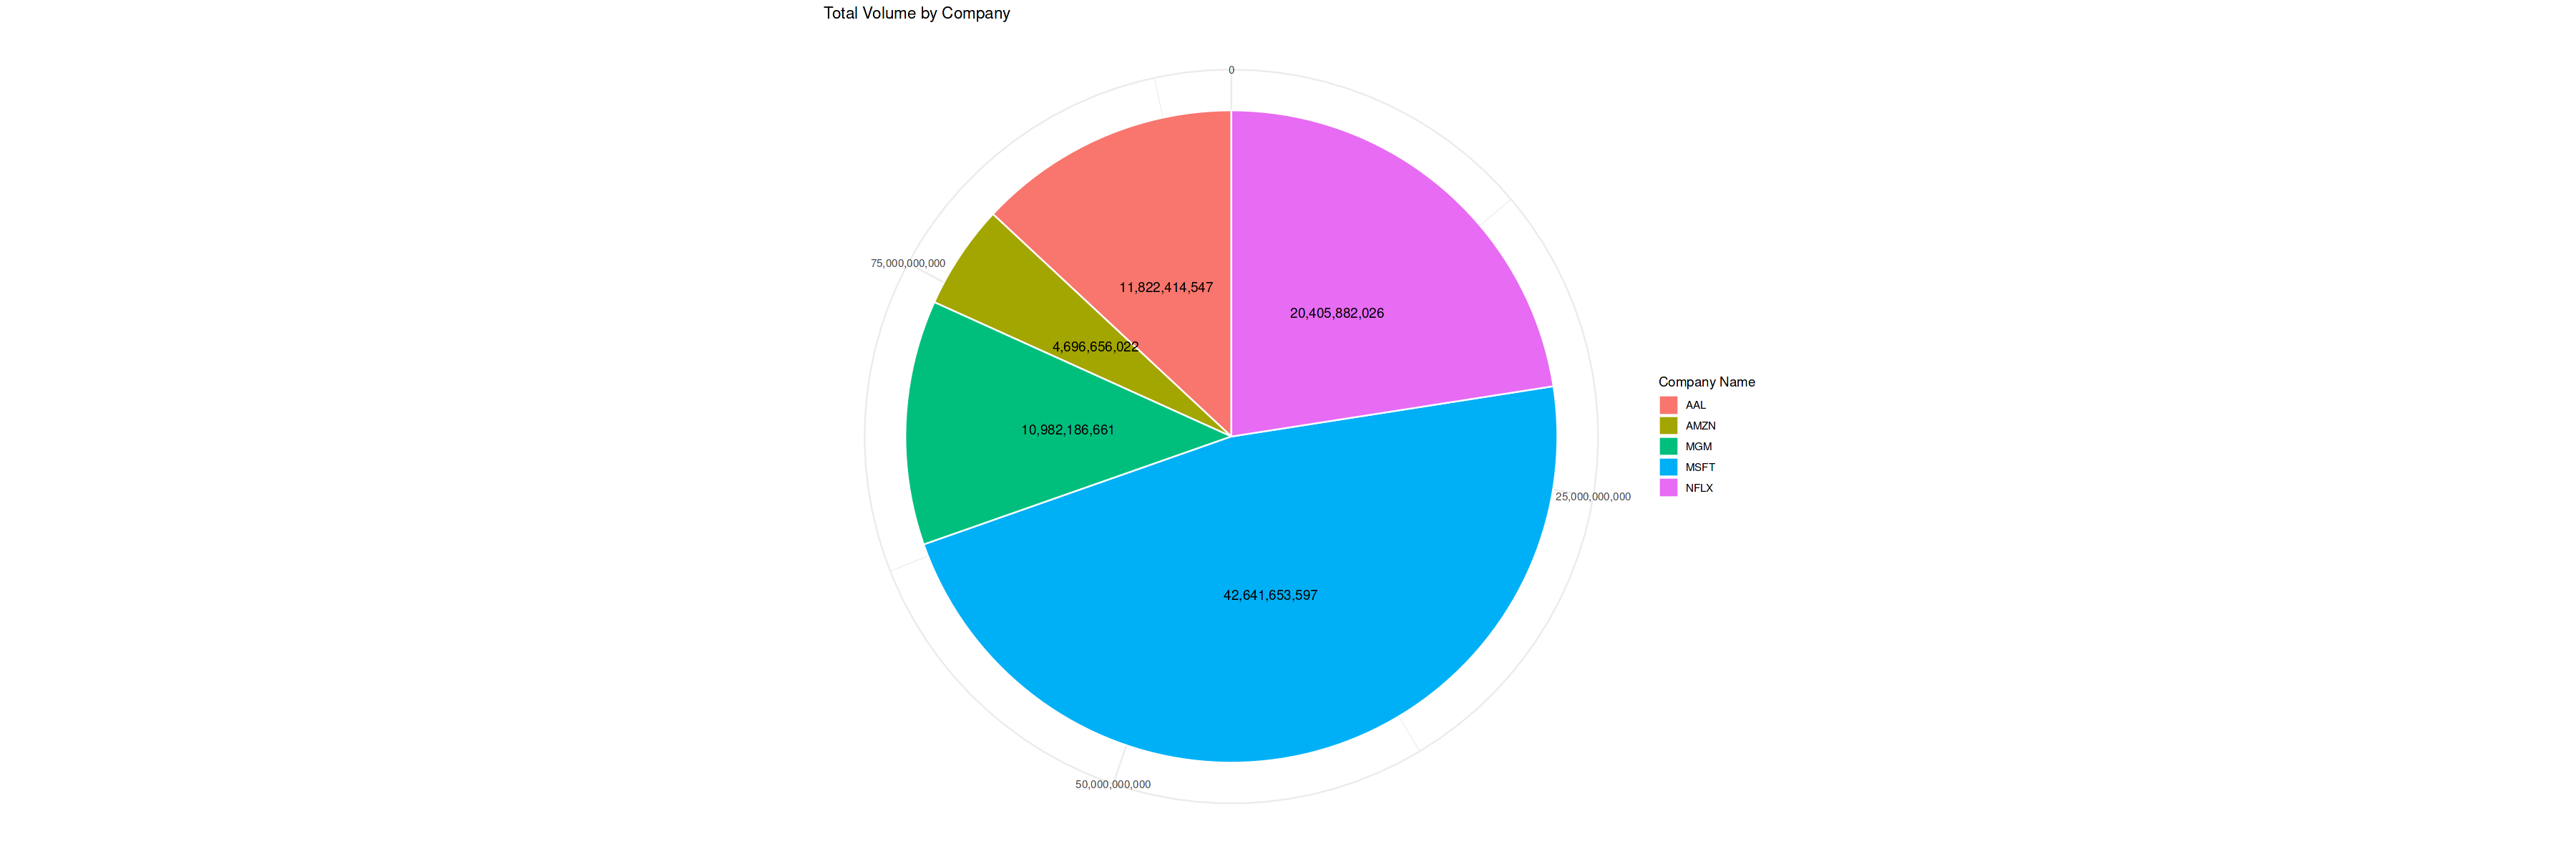

In [21]:
df_5$date <- as.Date(df_5$date)

df_5 %>%
  select(company_name, volume) %>% 
  group_by(company_name) %>% 
  summarise(total_volume = sum(volume), .groups = 'drop') %>%
  ggplot(aes(x = "", y = total_volume, fill = company_name)) +
  geom_bar(stat = "identity", width = 5, color = "white") +
  geom_text(aes(label = scales::comma(total_volume)), position = position_stack(vjust = 0.5)) +  
  scale_y_continuous(labels = scales::comma) +
  coord_polar("y", start = 0) +
  labs(title = "Total Volume by Company",
       fill = "Company Name",
       x = NULL,
       y = NULL) +
  theme_minimal() +
  theme(axis.text.y = element_text(face = 'bold', size = 20),
        axis.title = element_blank())  

**Creating Box Plot for compare the distribution of the 5 Companies**

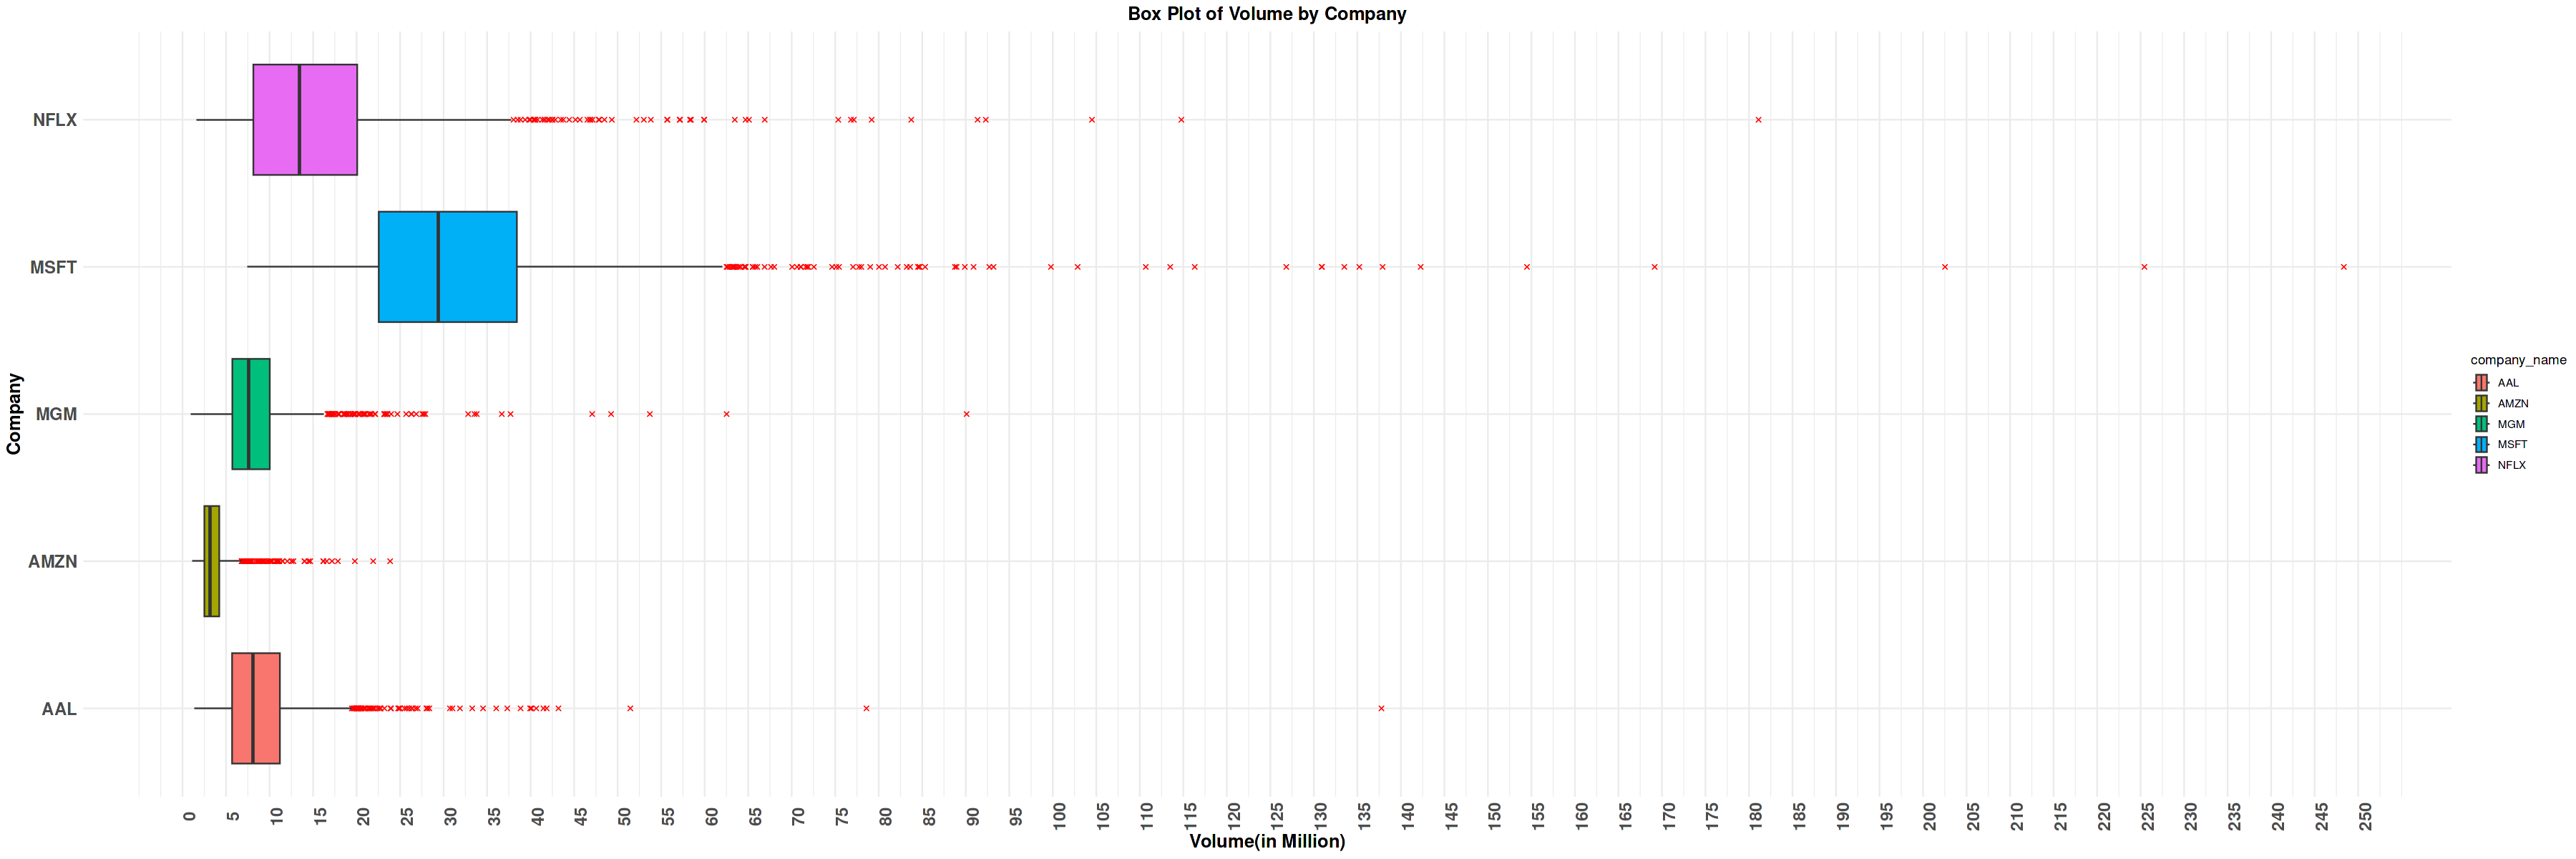

In [22]:

df_5 %>%
ggplot(aes(x = volume/1e6, y = company_name, fill = company_name))+
geom_boxplot(outlier.color = "red", outlier.shape = 4)+
scale_x_continuous(breaks = seq(0,250,by=5))+
labs(title = "Box Plot of Volume by Company", x = "Volume(in Million)", y = "Company")+
theme_minimal()+
theme(plot.title = element_text(face = 'bold', size = 15, hjust = 0.5),
     axis.title.x = element_text(face = 'bold', size = 15),
     axis.title.y = element_text(face = 'bold', size = 15),
     axis.text.x = element_text(face = 'bold', size = 14, angle = 90),
     axis.text.y = element_text(face = 'bold', size = 14))

In [23]:
companies <- unique(df_5$company_name)

for (company_name in companies) 
{
  df_6 <- df_5[df_5$company_name == company_name, ]
  cat("Company:", company_name, "\n")
  cat("Min :", min(df_6$volume),"| Q1 :" ,quantile(df_6$volume,0.25), "| Q2:", quantile(df_6$volume,0.5),"| Q3:", quantile(df_6$volume,0.75),"|Max : ", max(df_6$volume),"| Range:", range(df_6$volume),"=", max(df_6$volume)-min(df_6$volume),"\n")
  cat("IQR:", IQR(df_6$volume), "\n\n")
}


Company: AAL 
Min : 1352400 | Q1 : 5696393 | Q2: 8111323 | Q3: 11188535 |Max :  137767165 | Range: 1352400 137767165 = 136414765 
IQR: 5492142 

Company: AMZN 
Min : 1092970 | Q1 : 2511165 | Q2: 3144719 | Q3: 4220246 |Max :  23856060 | Range: 1092970 23856060 = 22763090 
IQR: 1709082 

Company: MGM 
Min : 950725 | Q1 : 5725646 | Q2: 7628536 | Q3: 10025792 |Max :  90098241 | Range: 950725 90098241 = 89147516 
IQR: 4300146 

Company: MSFT 
Min : 7425603 | Q1 : 22548791 | Q2: 29387581 | Q3: 38420244 |Max :  248354245 | Range: 7425603 248354245 = 240928642 
IQR: 15871454 

Company: NFLX 
Min : 1616260 | Q1 : 8139126 | Q2: 13452124 | Q3: 20071628 |Max :  181099968 | Range: 1616260 181099968 = 179483708 
IQR: 11932502 



* Overall **"MSFT"** has the larger spread.
* Every company has the outliers
* **AMZN** has the smallest spread of results.
* **MSFT** is the leading company for volume among the 5 companies.

**Finding Monthly Total volume and converting that summarize data to visual**

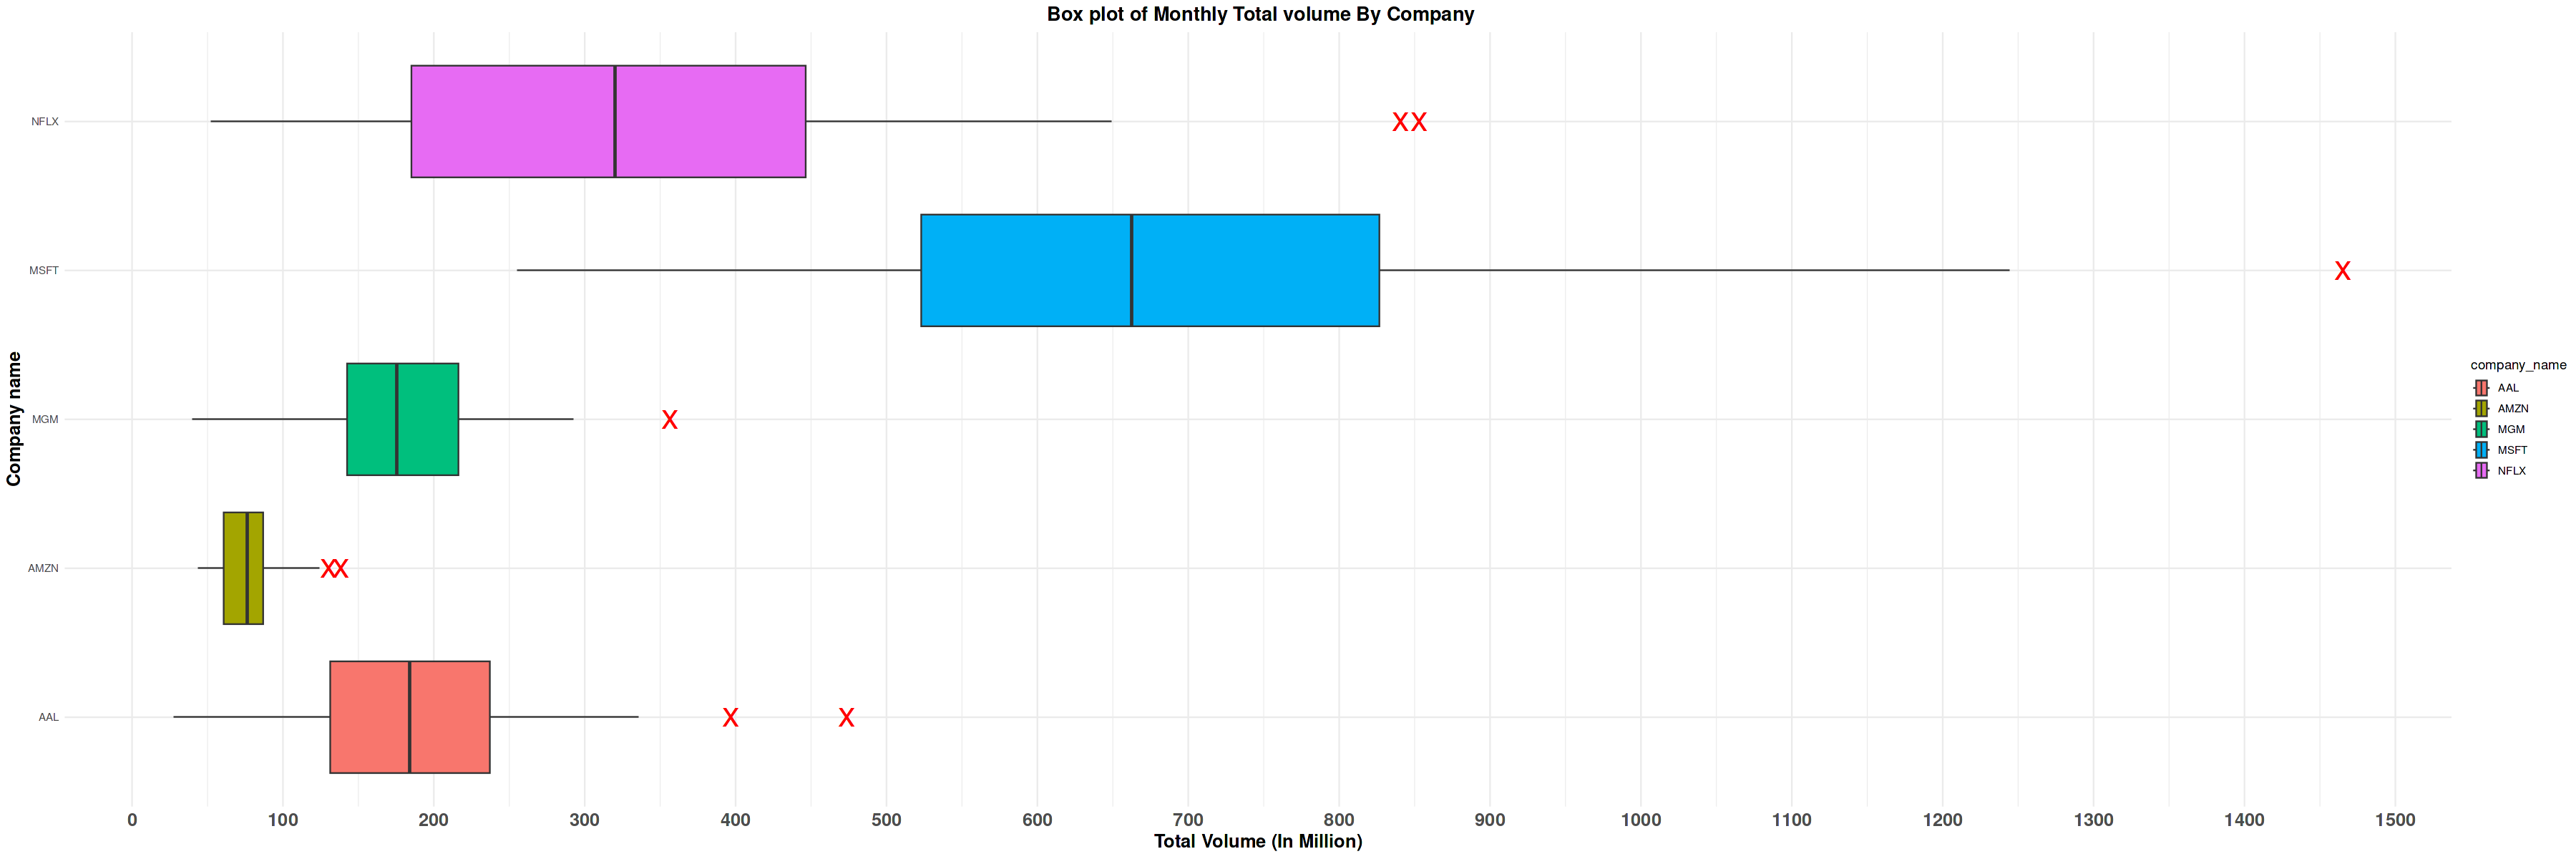

In [24]:
df_5 %>% select(company_name, date,volume) %>% group_by (company_name, Year =year(date), Month = month (date))%>% summarise(total_volume = sum(volume), .groups = 'drop')%>%
ggplot(aes( x = total_volume/1e6, y = company_name, fill = company_name))+
scale_x_continuous(breaks = seq(0,1500,by=100))+
geom_boxplot(outlier.color = 'red', outlier.shape = 'x' , outlier.size = 10)+
labs(title = " Box plot of Monthly Total volume By Company", x = "Total Volume (In Million)", y = "Company name")+
theme_minimal()+
theme(
    plot.title = element_text(face = 'bold', size = 16, hjust = 0.5),
    axis.title.x = element_text(face ='bold', size = 15),
    axis.title.y = element_text(face ='bold', size = 15),
    axis.text.x = element_text(face ='bold', size = 15)
)
